# Упражнение 1
----

_Выведите формулу второго порядка точности для первой производной $f'(x)$ в точке $x_0$_

_Постройте графики погрешностей для функции $f(x) = \sin (x)$ в какой-нибудь точке $x_0$ для нескольких зачений $1 \geq \alpha \geq 2$ и шага $h \in [10^{-8}, 1]$._

_Прокомментируйте полученные зависимости._


### Решение

$$f(x + h) = f(x) + h \cdot f'(x) + \frac{h^2}{2} \cdot f''(x) + O(h^3)\\ \\ \\
f(x - h) = f(x) - h \cdot f'(x) + \frac{h^2}{s} \cdot f''(x) + O(h^3)$$

Вычтем из первого уравнения второе, получим:

$$f(x + h) - f(x - h) = 2h \cdot f(x) + O(h^3)\\ \\ \\
f'(x) = \frac{f(x + h) - f(x - h)}{2h} + O(h^2)$$

Для точек $x - \frac{h}{\alpha},\ x + \frac{h}{\alpha}$ получим аналогичную формулу:

$$f'(x) = \frac{f(x + \frac{h}{\alpha}) - f(x - \frac{h}{\alpha})}{2\frac{h}{\alpha}} + O((\frac{h}{\alpha})^2)$$

----

Для $f(x) = sin(x)$ получим

$$error(h, \alpha) = \cos (x_0) - \frac{f(x_0 + \frac{h}{\alpha}) - f(x_0 - \frac{h}{\alpha})}{2\frac{h}{\alpha}} + O((\frac{h}{\alpha})^2)$$


In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [28]:
def plot_error(h, error, title):
    plt.figure(figsize=(15, 15))
    n = len(h)
    
    for i in range(n):
        plt.subplot(n // 2, 2, i + 1)    
        plt.title(title[i])
        plt.ylabel("error")
        plt.xlabel("h")
        plt.grid()
        
        plt.plot(h[i], error[i], 'g.-')
    
    plt.show()

In [3]:
def generate_steps(min_value, max_value, steps_count):
    return np.linspace(min_value, max_value, steps_count)

In [17]:
def my_derivative(func, x, h, alpha):
    return (func(x + h / alpha) - func(x - h / alpha)) / (2 * (h / alpha))

In [25]:
alpha_min = 1
alpha_max = 2
alpha_count = 4

h_min = 0.00000001
h_max = 1
h_count = 500

x_0 = 1

In [26]:
alpha_all = generate_steps(alpha_min, alpha_max, alpha_count)

title_all = ["alpha = " + str(alpha) for alpha in alpha_all]

h_all = [(1. / alpha) * generate_steps(h_min, h_max, h_count) for alpha in alpha_all]
    
error_all = [[math.cos(x_0) - my_derivative(math.sin, 
                                            x_0, 
                                            h_all[alpha_index][h_index], 
                                            alpha_all[alpha_index]) for h_index in range(h_count)] 
             for alpha_index in range(alpha_count)]

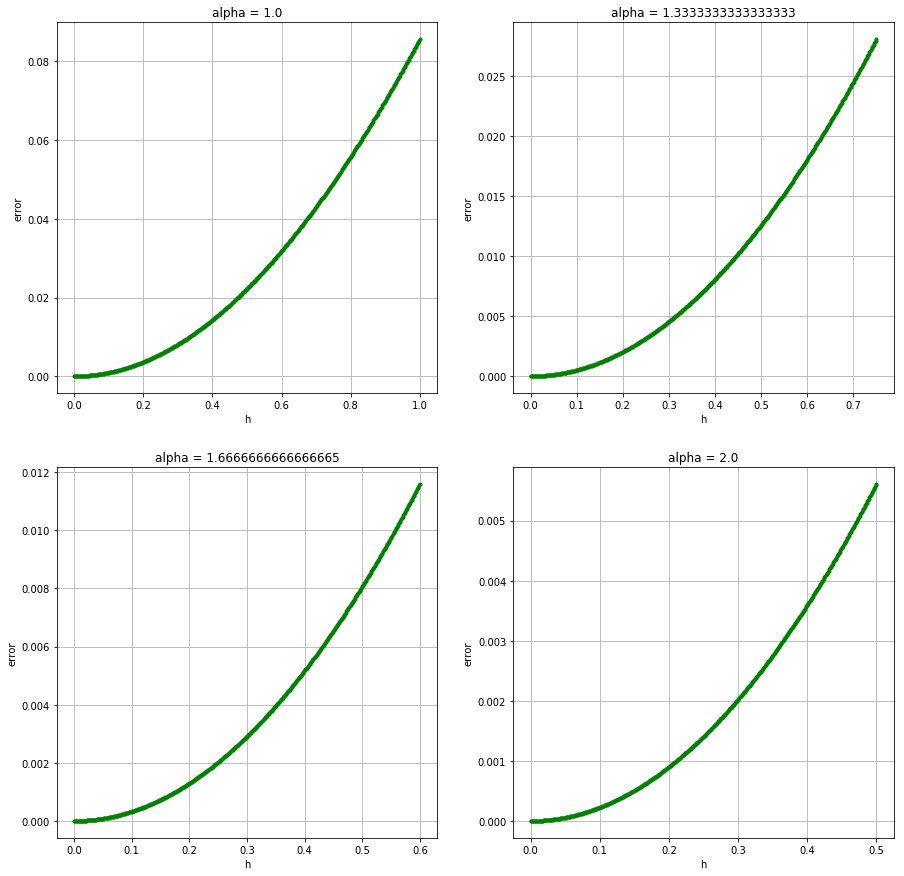

In [29]:
plot_error(h_all, error_all, title_all)

Видим квадратичную зависимость ошибки от шага.

С увеличением $\alpha$ уменьшается шаг, вместе с этим уменьшается $error$.